In [41]:
from PIL import Image, ImageOps
import numpy as np
from einops import rearrange
from src.utils.mask_v2 import Maskerv2

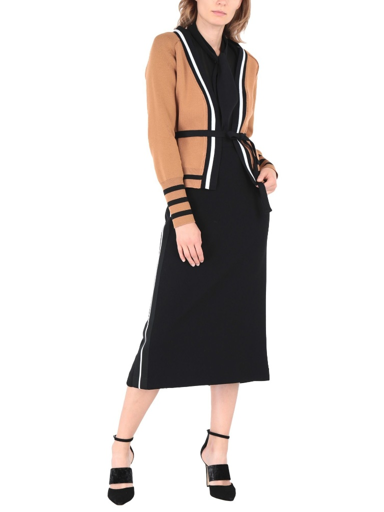

In [93]:
h, w = (512, 384)
img = Image.open('../datasets/dresscode/lower_body/images/016653_0.jpg')
# img = Image.open('../assets/red_dress_girl.jpg')
img = ImageOps.fit(img, size=(w, h))
img

2025-01-22 02:24:27.388794235 [E:onnxruntime:Default, provider_bridge_ort.cc:1992 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1637 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.12: cannot open shared object file: No such file or directory

2025-01-22 02:24:27.388821394 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:965 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Require cuDNN 9.* and CUDA 12.*. Please install all dependencies as mentioned in the GPU requirements page (https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements), make sure they're in the PATH, and that your GPU is supported.
2025-01-22 02:24:27.954615839 [E:onnxruntime:Default, provider_bridge_ort.cc:1992 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_

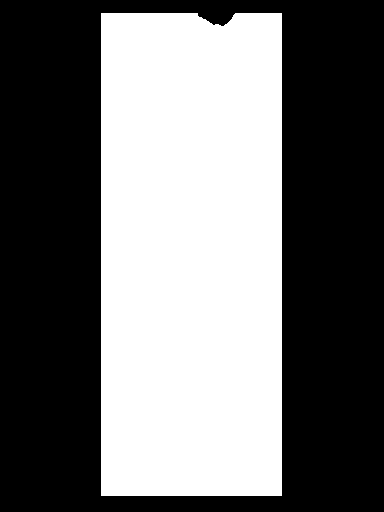

In [94]:
masker = Maskerv2()
mask, body_parse = masker.create_mask(img, category='lower_body', return_body_parse=True)
mask

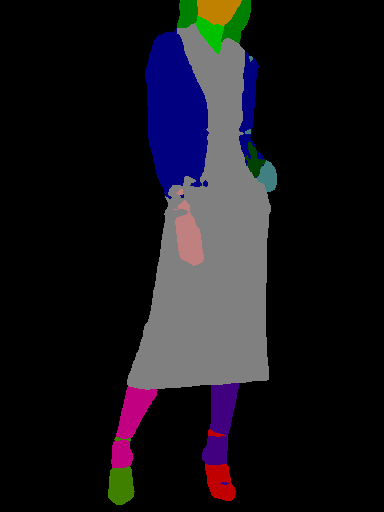

In [95]:
body_parse

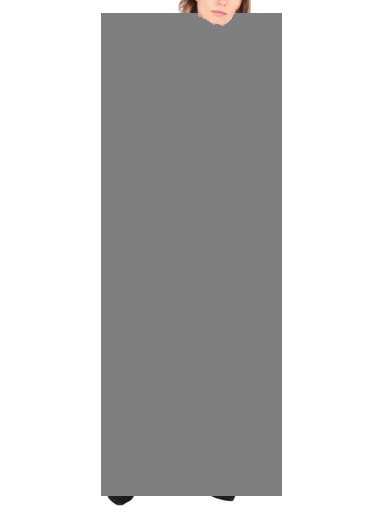

In [96]:
mask_np = np.array(mask)
mask_np = np.stack([mask_np] * 3)
mask_np = rearrange(mask_np, 'c h w -> h w c')
img_np = np.array(img)
out = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
Image.fromarray(out)

In [97]:
# mask = Image.open('../datasets/vitonhd/train/agnostic-mask-v2/00113_00.jpg')

# mask_np = np.array(mask)
# mask_np = np.stack([mask_np] * 3)
# mask_np = rearrange(mask_np, 'c h w -> h w c')
# img_np = np.array(img)
# masked_img_np = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
# Image.fromarray(masked_img_np)

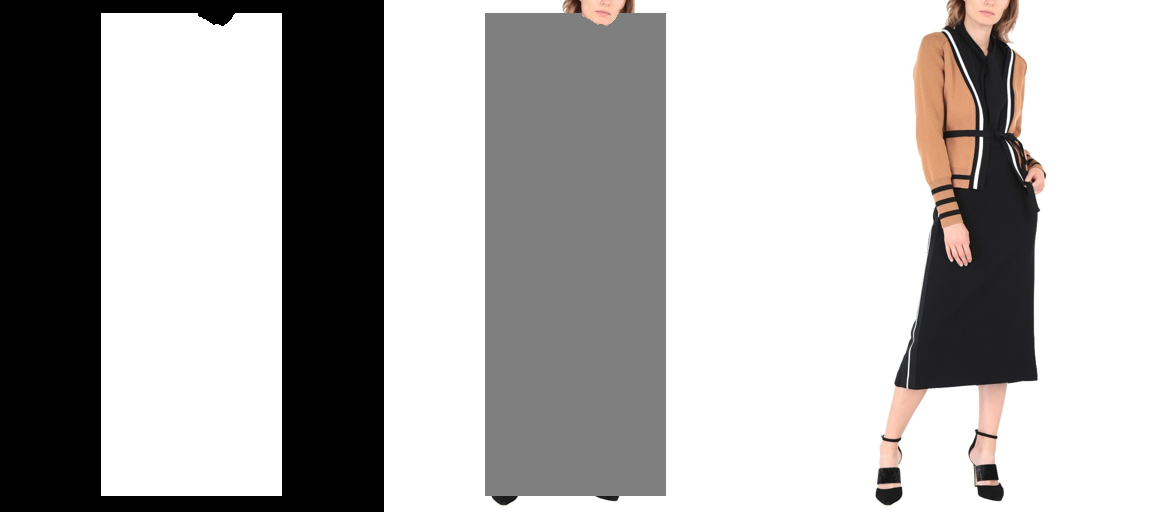

In [98]:
from diffusers.utils import make_image_grid

make_image_grid([mask, Image.fromarray(out), img], 1, 3)